In [1]:
# Import functions for graphing and methods (also includes some libraries needed for data analysis)
from cross_val_funcs import *
from method_funcs import * 

%matplotlib inline

# set style parameters for graphs
sns.set_style("darkgrid", {'axes.edgecolor': 'black'})
plt.rcParams['font.size'] = 12
plt.rcParams['axes.titlesize'] = 16
plt.rcParams["legend.edgecolor"] = 'black'
plt.rcParams["legend.fontsize"] = 13
plt.rcParams['figure.dpi'] = 300

**Cross Val Stations**: [115, 134, 143, 152, 156, 157, 167,  63,  85,  87,  92,  36,  58,   1, 110, 113, 114, 118]

In [30]:
df_dict = {}

stations = [115, 134, 143, 152, 156, 157, 167, 63, 85, 87, 92, 36, 58, 1, 110, 113, 114, 118]

for station in stations:
    
    print(f"Cross Validating Station {station}")
    
    s_pivot, years = create_pivot(station) # Create pivot table for station
    years.insert(0,0) # insert start date
    years.append(len(s_pivot))
    
    # Find which dates are needed for data (exclude 2023 - sythetic data used instead)
    dates = np.arange(2024-len(years)+1,2023)

    year_idx = {} # dictionary to hold year & index values

    for i, y in enumerate(dates): # create dictionary + index pairings
        year_idx[y] = [years[i], years[i+1]]
        
    # Run cross validation on given station & append to dictionary of dataframes
    n_folds = 5
    n_flags = 500
    temp_inj = 60
    delta_inj = 10
    
    df_dict[station] = perform_cross_val(station, dates, year_idx, s_pivot, n_folds, n_flags, temp_inj, delta_inj)
    
# Take the average and standard deviation for each parameter result, grouped by estimation years
all_data = pd.concat([df_dict[s] for s in list(df_dict.keys())])
res = all_data.groupby('Estimation Years').agg(['mean', 'std']).round(3)
res

Cross Validating Station 115
Cross Validating Station 134
Cross Validating Station 143
Cross Validating Station 152
Cross Validating Station 156
Cross Validating Station 157
Cross Validating Station 167
Cross Validating Station 63
Cross Validating Station 85
Cross Validating Station 87
Cross Validating Station 92
Cross Validating Station 36
Cross Validating Station 58
Cross Validating Station 1
Cross Validating Station 110
Cross Validating Station 113
Cross Validating Station 114
Cross Validating Station 118


TEMP_LB_F1        TEMP_UB_F1        DELTA_LB_F1         \
                       mean    std       mean    std        mean    std   
Estimation Years                                                          
1.0                   0.550  0.147      0.325  0.085       0.990  0.006   
2.0                   0.749  0.127      0.783  0.075       0.993  0.006   
3.0                   0.848  0.082      0.959  0.032       0.993  0.006   
4.0                   0.886  0.090      0.975  0.016       0.993  0.005   
5.0                   0.931  0.055      0.991  0.004       0.993  0.005   
6.0                   0.965  0.035      0.992  0.005       0.993  0.006   
7.0                   0.963  0.035      0.995  0.004       0.993  0.006   
8.0                   0.974  0.029      0.994  0.004       0.993  0.006   

                 DELTA_UB_F1         
                        mean    std  
Estimation Years                     
1.0                    0.993  0.006  
2.0                    0.995  0.005  
3.0                    0.995  0.005  
4.0                    0.995  0.004  
5.0                    0.995  0.004  
6.0                    0.995  0.005  
7.0                    0.995  0.005  
8.0                    0.995  0.005

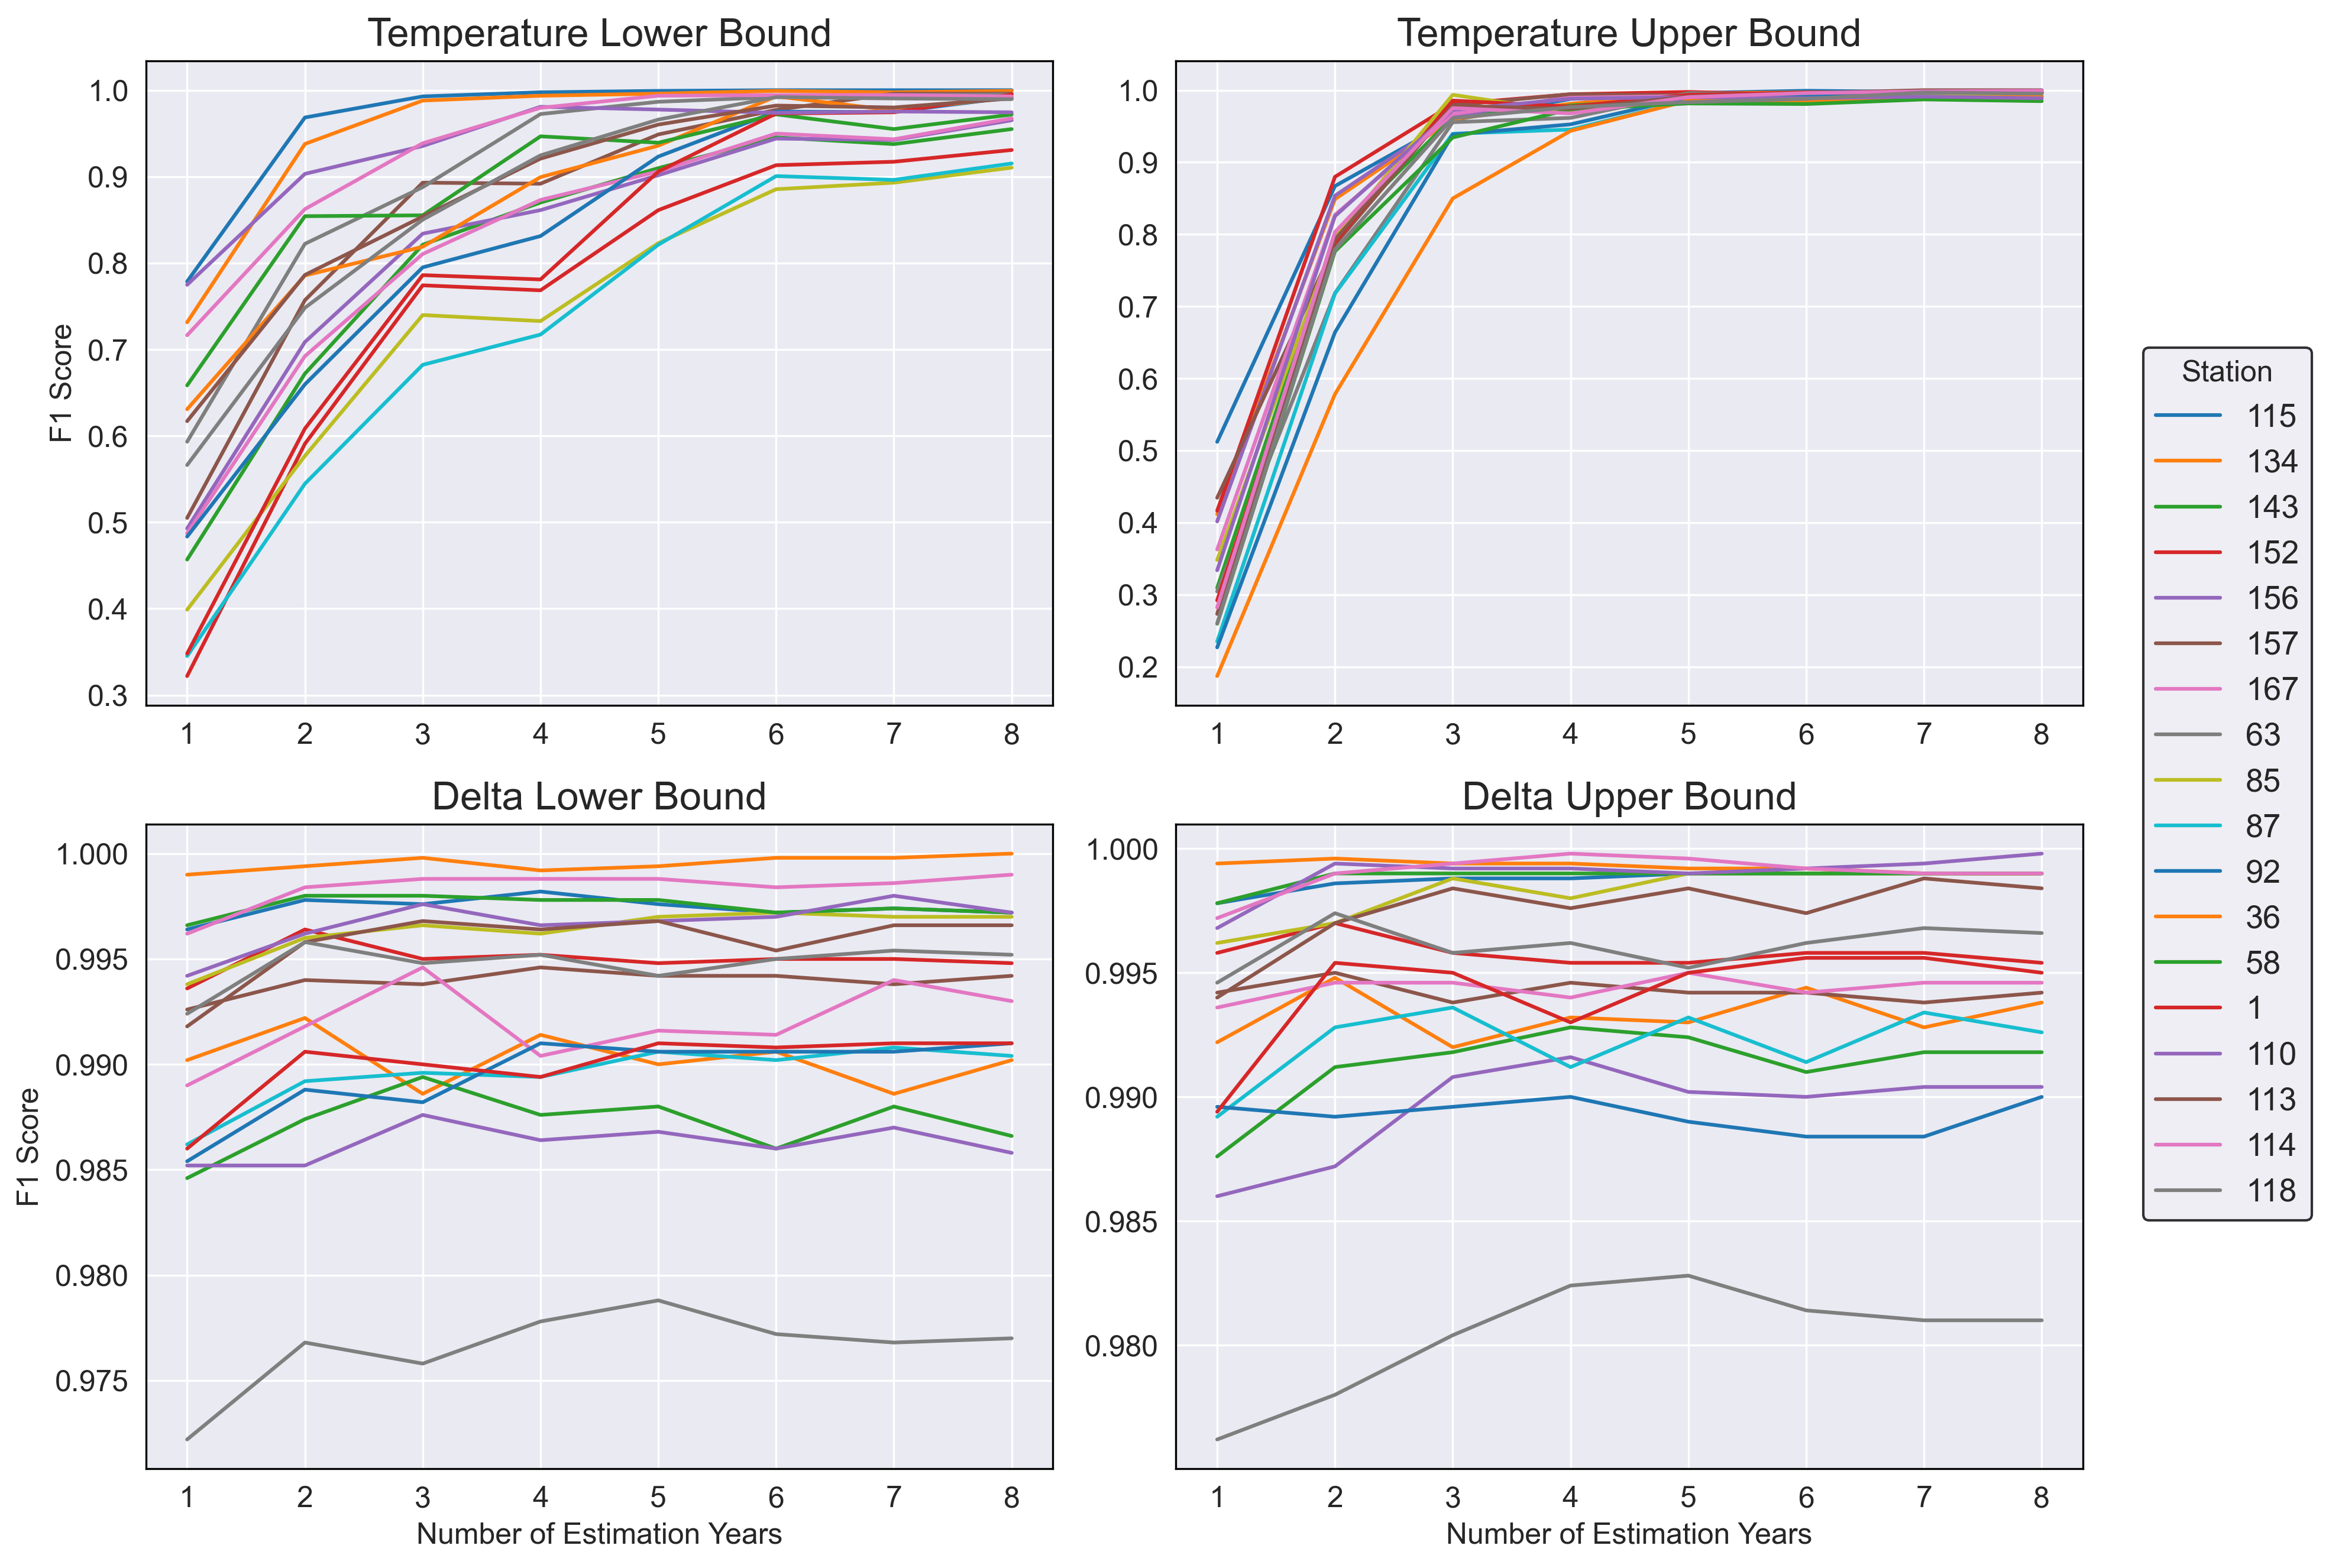

In [32]:
# Plot eval metrics for each station, across estimation years
plot_eval(df_dict)

In [7]:
s_num = 118
n_folds = 5
n_flags = 500
temp_inj = 60
delta_inj = 10

s_pivot, years = create_pivot(s_num) # Create pivot table for station
years.insert(0,0) # insert start date
years.append(len(s_pivot))

# Find which dates are needed for data (exclude 2023 - sythetic data used instead)
dates = np.arange(2024-len(years)+1,2023)

year_idx = {} # dictionary to hold year & index values

for i, y in enumerate(dates): # create dictionary + index pairings
    year_idx[y] = [years[i], years[i+1]]

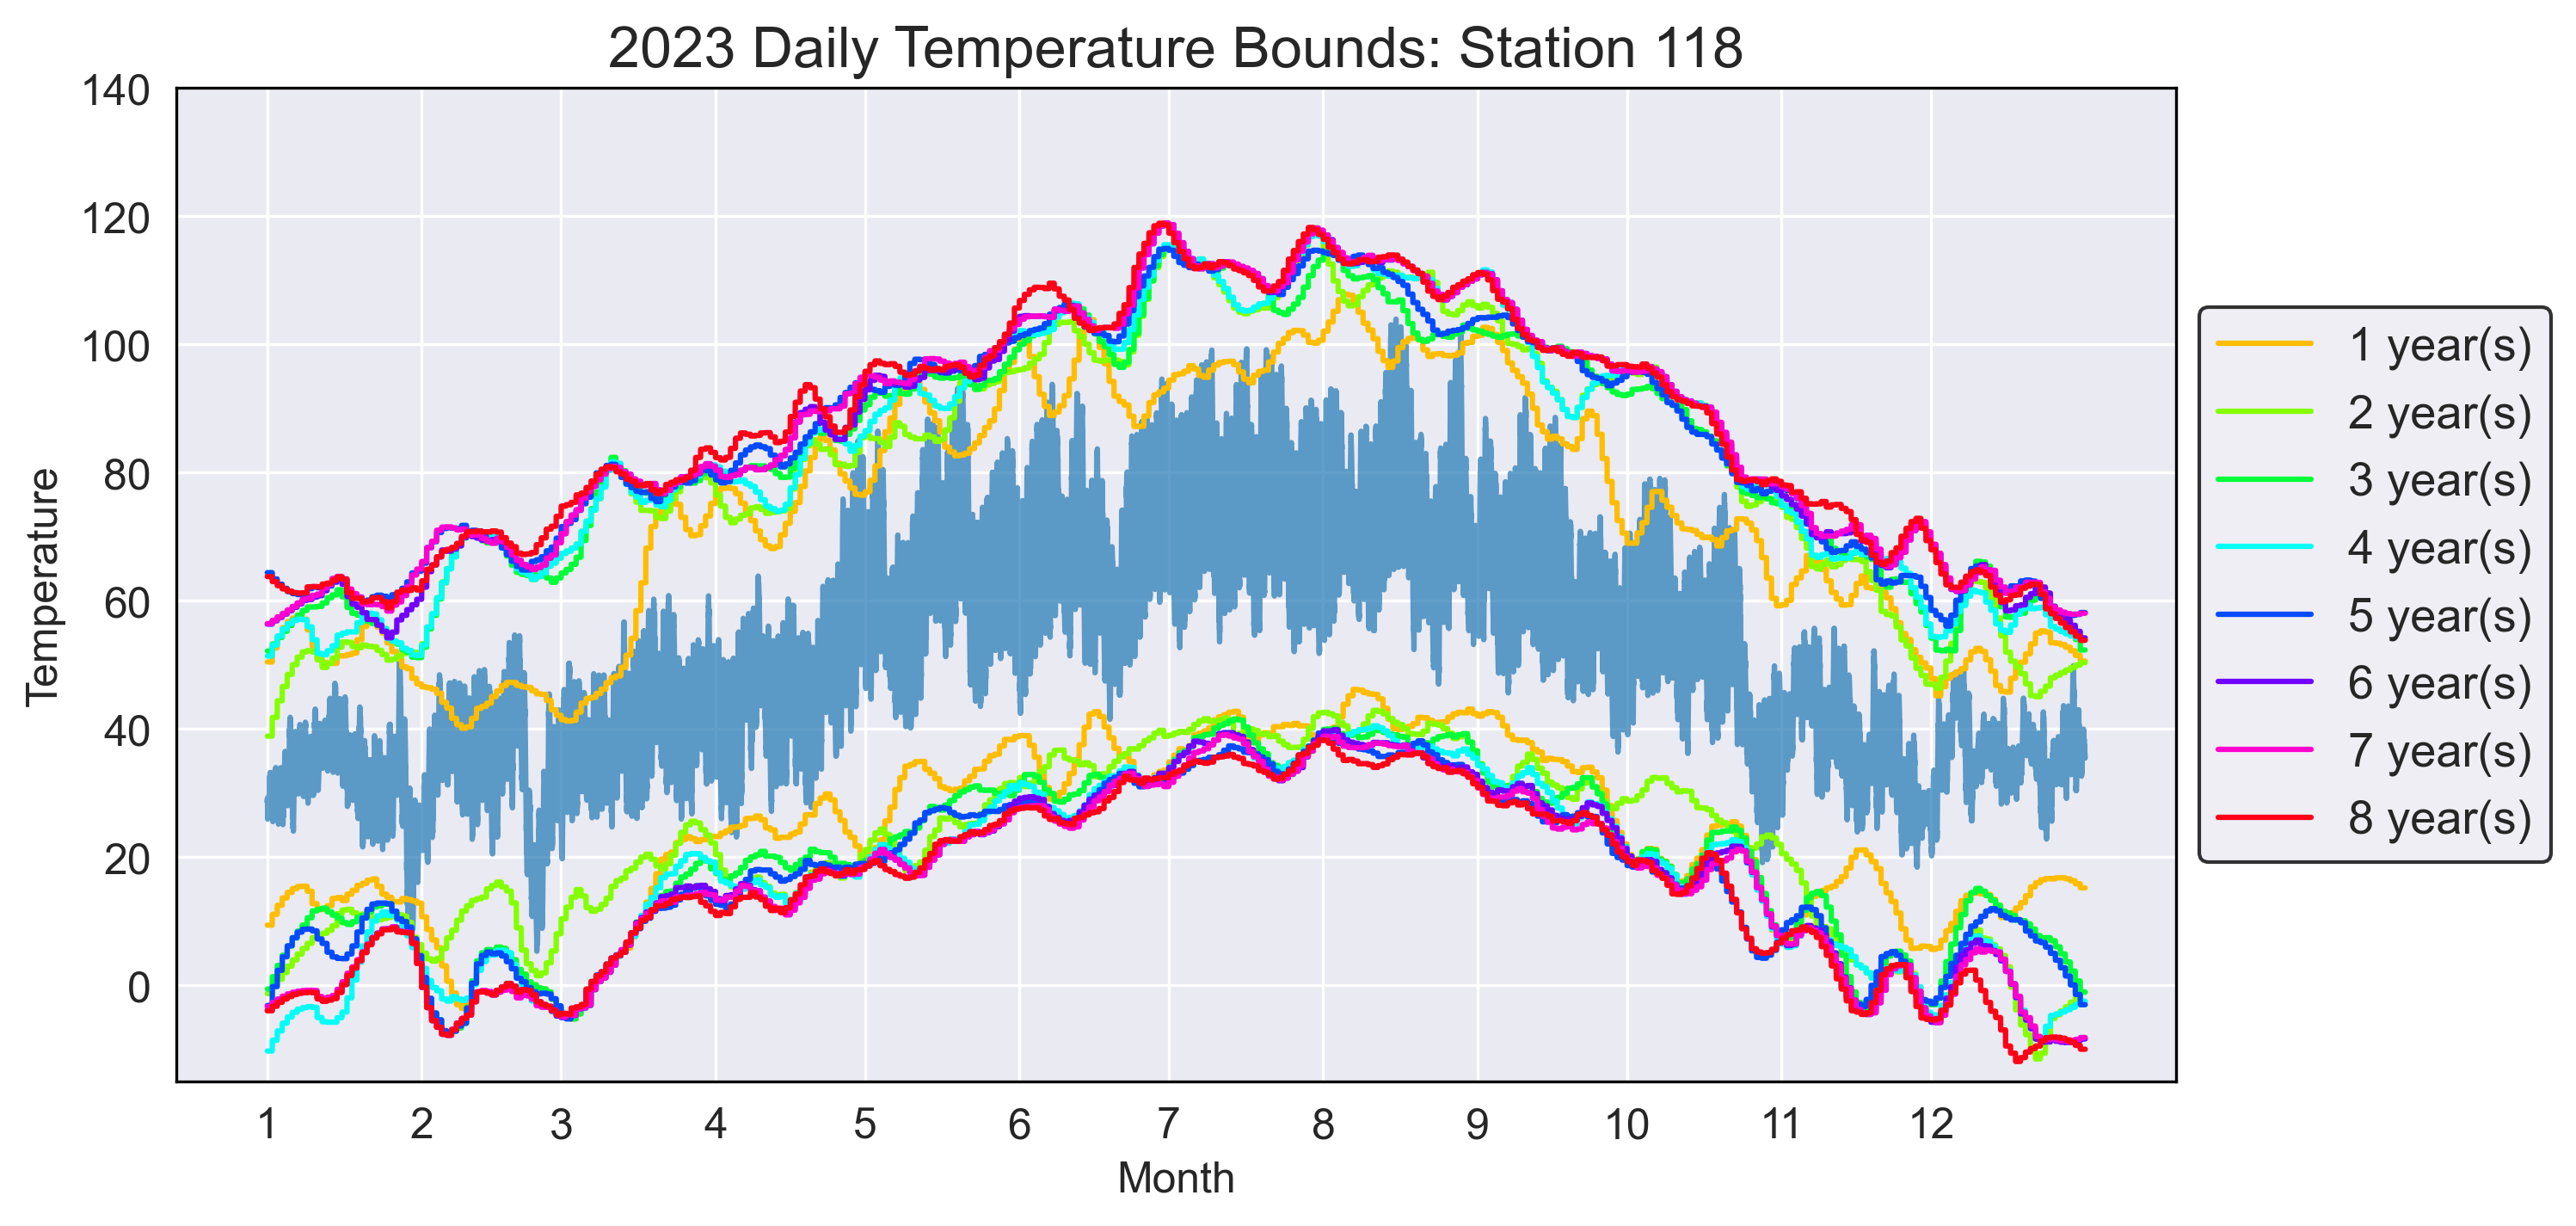

In [13]:
# Get best parameters (on average) for each number of estimation years
est_params = cross_val_ests(s_num, dates, year_idx, s_pivot, n_folds, n_flags, temp_inj, delta_inj)

# Plot temperature bounds (min/max) on sythetic data (generate in function, same as cross val)
cross_val_temp_graph(est_params, s_num)

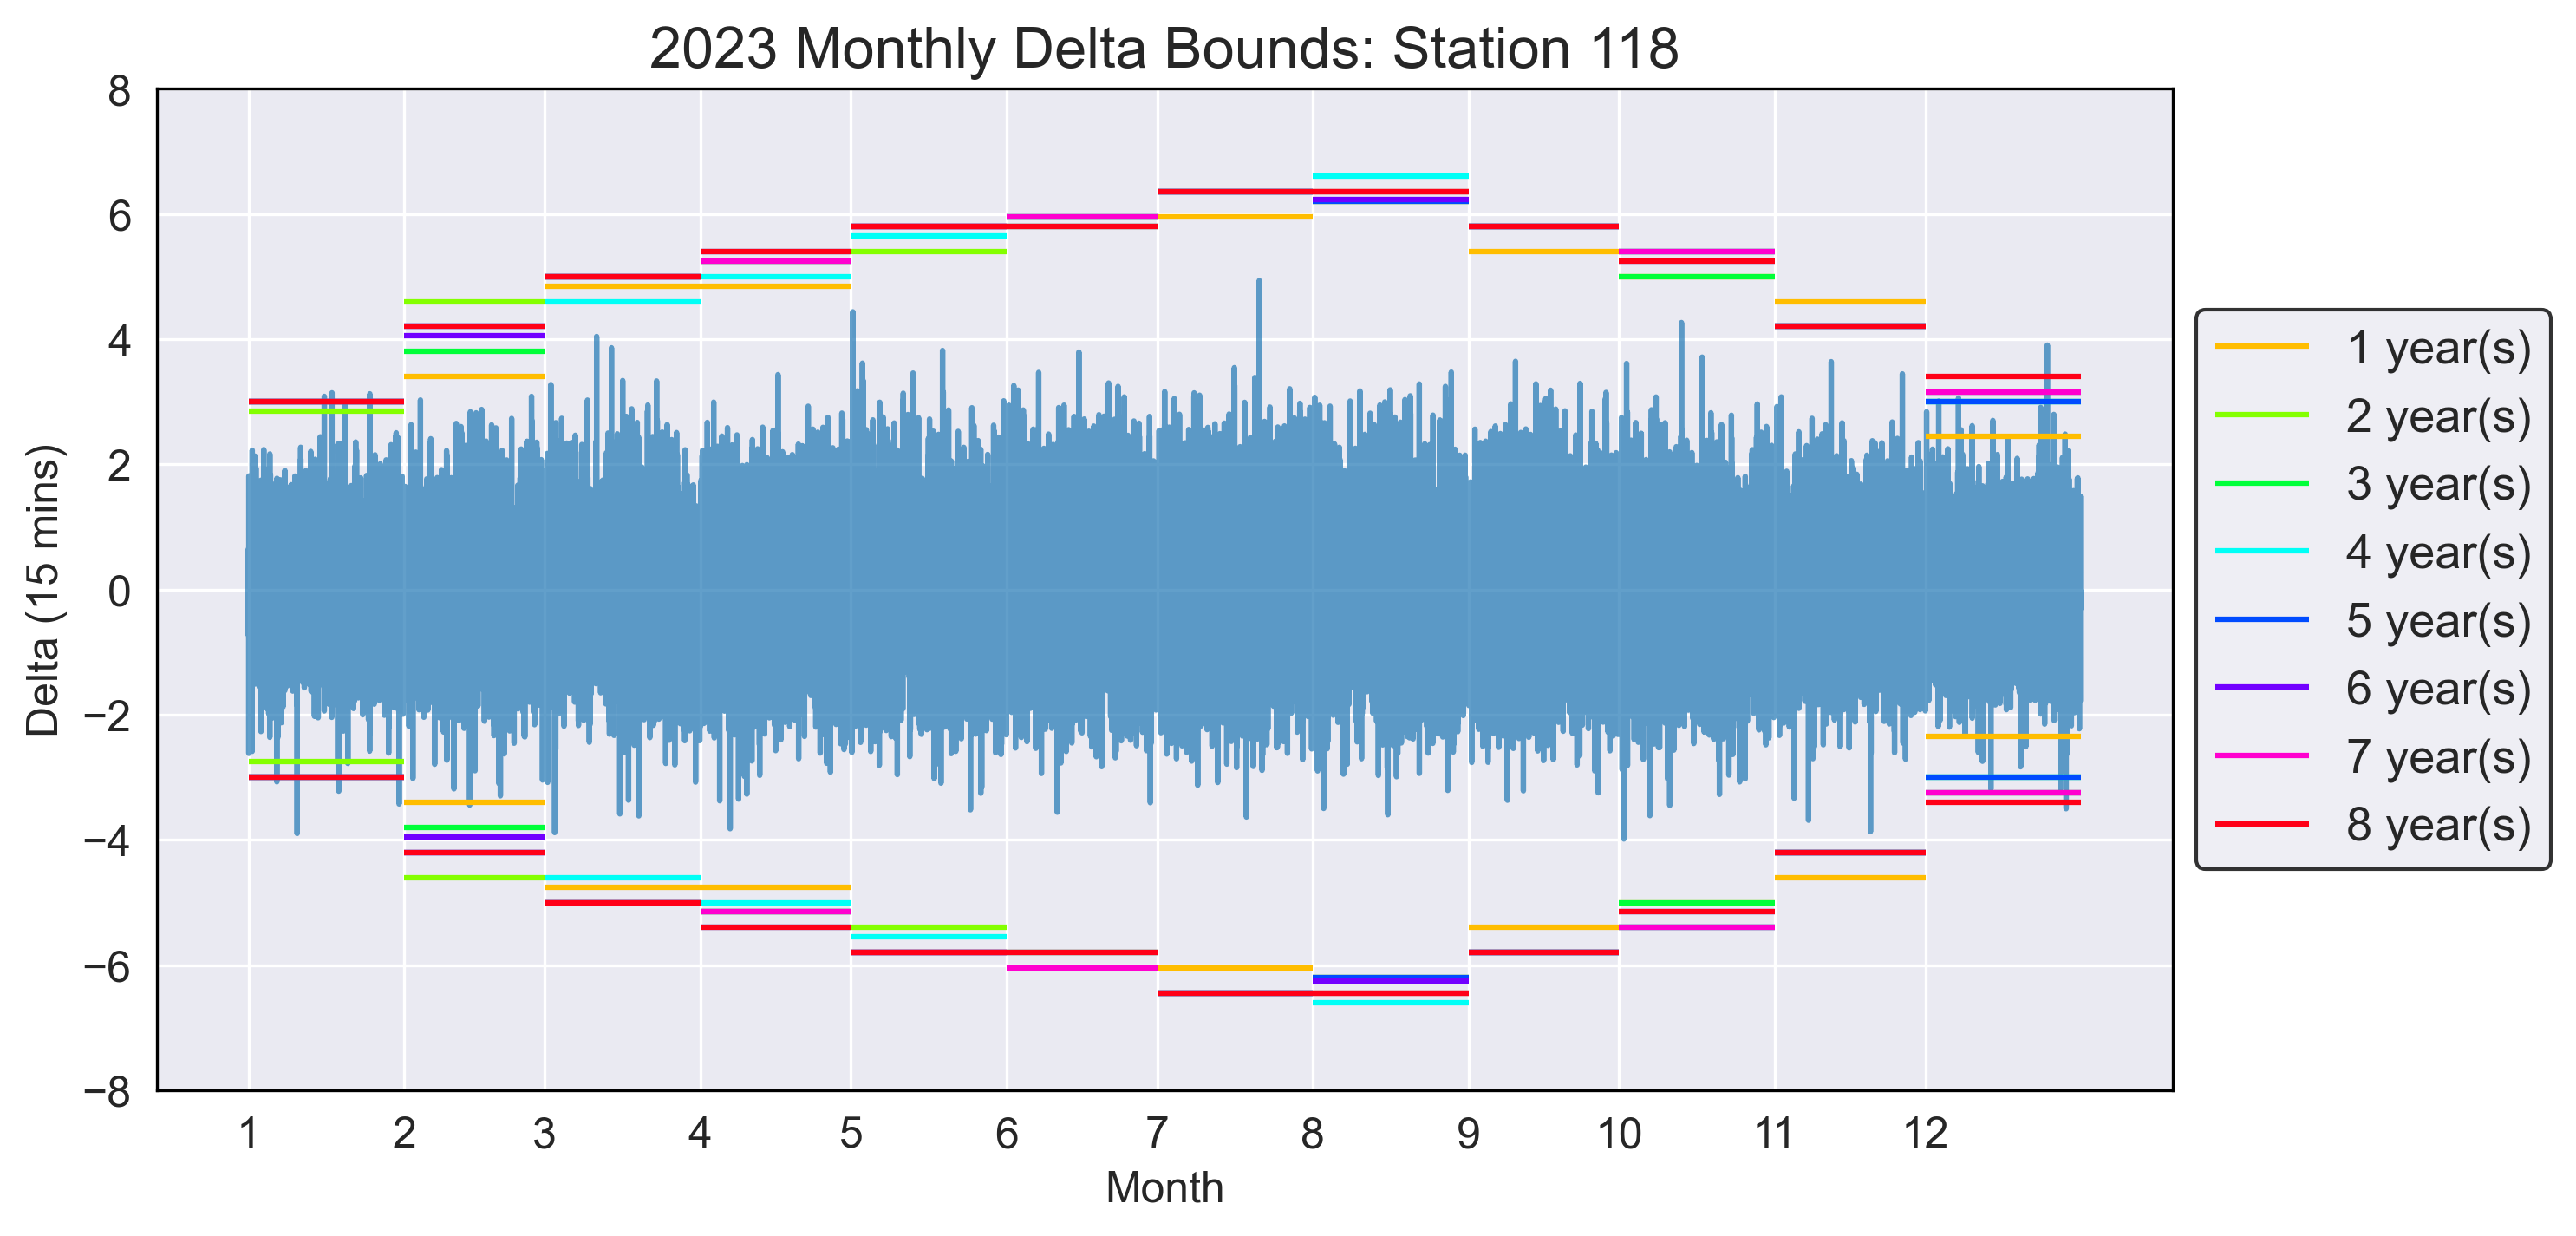

In [11]:
# Plot delta bounds (min/max) on sythetic data (generate in function, same as cross val)
cross_val_delta_graph(est_params, s_num)

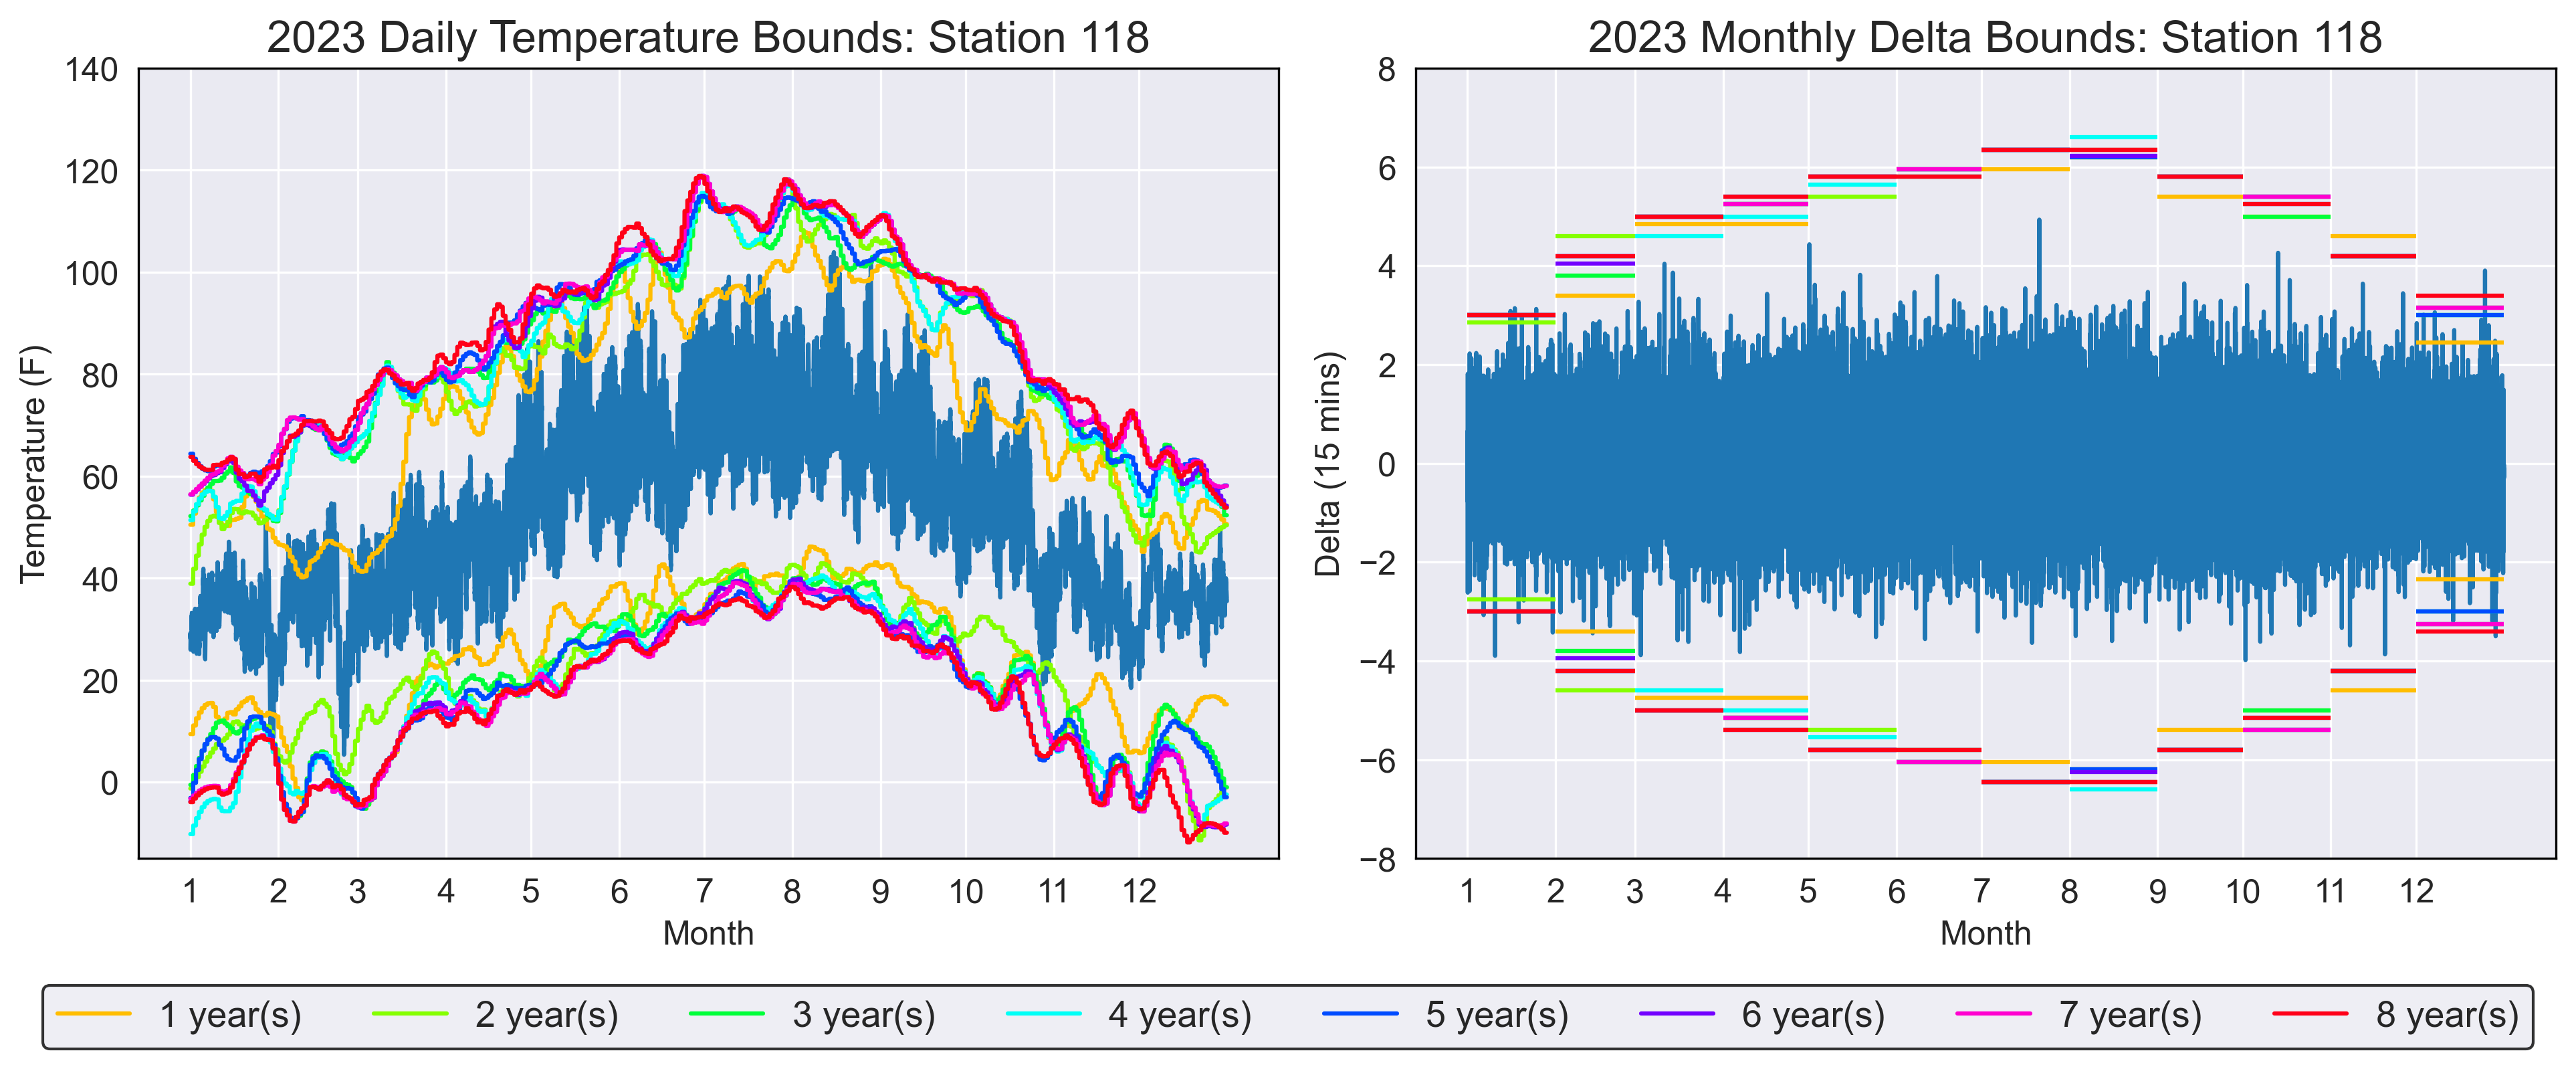

In [56]:
cross_val_graphs(est_params, s_num)